# Distribuciones de probabilidad con Python

### Función de Masa de Probabilidad

Otra forma de representar a las [distribuciones discretas](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad#Distribuciones_de_variable_discreta) es utilizando su [Función de Masa de Probabilidad](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_probabilidad) o [FMP](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_probabilidad), la cual relaciona cada valor con su *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* en lugar de su *frecuencia* como vimos anteriormente. Esta función es *normalizada* de forma tal que el valor total de *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* sea 1. La ventaja que nos ofrece utilizar la [FMP](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_probabilidad) es que podemos comparar dos [distribuciones](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) sin necesidad de ser confundidos por las diferencias en el tamaño de las *[muestras](https://es.wikipedia.org/wiki/Muestra_estad%C3%ADstica)*. También debemos tener en cuenta que [FMP](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_probabilidad) funciona bien si el número de valores es pequeño; pero a medida que el número de valores aumenta, la *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* asociada a cada valor se hace cada vez más pequeña y el efecto del *ruido aleatorio* aumenta. 
Veamos un ejemplo con [Python](http://python.org/).

In [5]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

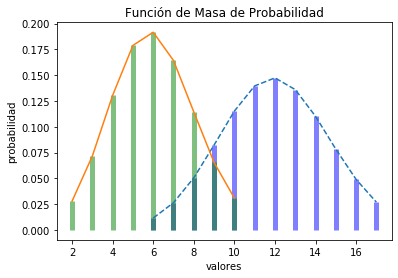

In [6]:
# Graficando FMP
n, p = 30, 0.4 # parametros de forma de la distribución binomial
n_1, p_1 = 20, 0.3 # parametros de forma de la distribución binomial
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))
x_1 = np.arange(stats.binom.ppf(0.01, n_1, p_1),
              stats.binom.ppf(0.99, n_1, p_1))
fmp = stats.binom.pmf(x, n, p) # Función de Masa de Probabilidad
fmp_1 = stats.binom.pmf(x_1, n_1, p_1) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.plot(x_1, fmp_1)
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.vlines(x_1, 0, fmp_1, colors='g', lw=5, alpha=0.5)
plt.title('Función de Masa de Probabilidad')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

### Función de Distribución Acumulada

Si queremos evitar los problemas que se generan con [FMP](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_probabilidad) cuando el número de valores es muy grande, podemos recurrir a utilizar la [Función de Distribución Acumulada](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n) o [FDA](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n), para representar a nuestras [distribuciones](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad), tanto [discretas](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad#Distribuciones_de_variable_discreta) como [continuas](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad_continua). Esta función relaciona los valores con su correspondiente [percentil](https://es.wikipedia.org/wiki/Percentil); es decir que va a describir la *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* de que una [variable aleatoria](https://es.wikipedia.org/wiki/Variable_aleatoria) X sujeta a cierta ley de [distribución de probabilidad](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) se sitúe en la zona de valores menores o iguales a x.

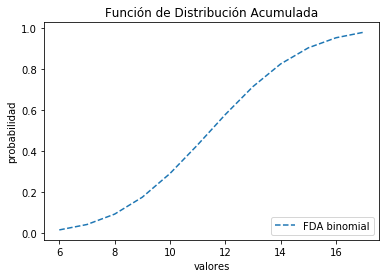

In [10]:
# Graficando Función de Distribución Acumulada con Python
x = np.arange(stats.binom.ppf(0.01, n, p),
              stats.binom.ppf(0.99, n, p))
fda_binom = stats.binom.cdf(x, n, p) # Función de Distribución Acumulada
plt.plot(x, fda_binom, '--', label='FDA binomial')
plt.title('Función de Distribución Acumulada')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.legend(loc=4)
plt.show()

### Distribución de Bernoulli

La [Distribución de Bernoulli](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Bernoulli) esta dada por la formula:

$$p(r;p) = \left\{
	\begin{array}{ll}
            1 - p = q  & \mbox{si } r = 0  \ \mbox{(fracaso)}\\
            p & \mbox{si } r = 1 \ \mbox{(éxito)}
	\end{array}
\right.$$

En dónde el parámetro $p$ es la *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* de éxito en un solo ensayo, la *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* de fracaso por lo tanto va a ser $1 - p$ (muchas veces expresada como $q$). Tanto $p$ como $q$ van a estar limitados al intervalo de cero a uno. La [Distribución de Bernoulli](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Bernoulli) describe un experimento probabilístico en donde el ensayo tiene dos posibles resultados, éxito o fracaso. Desde esta [distribución](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) se pueden deducir varias [Funciones de Densidad de Probabilidad](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_densidad_de_probabilidad) de otras [distribuciones](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) que se basen en una serie de ensayos independientes.

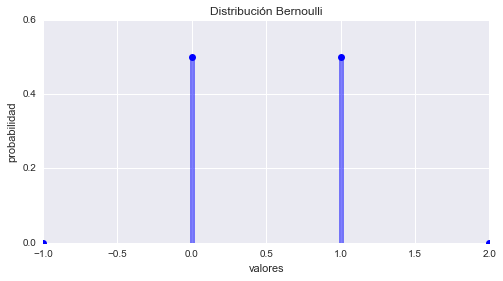

In [14]:
# Graficando Bernoulli
p =  0.5 # parametro de forma 
bernoulli = stats.bernoulli(p)
x = np.arange(-1, 3)
fmp = bernoulli.pmf(x) # Función de Masa de Probabilidad
fig, ax = plt.subplots()
ax.plot(x, fmp, 'bo')
ax.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
ax.set_yticks([0., 0.2, 0.4, 0.6])
plt.title('Distribución Bernoulli')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

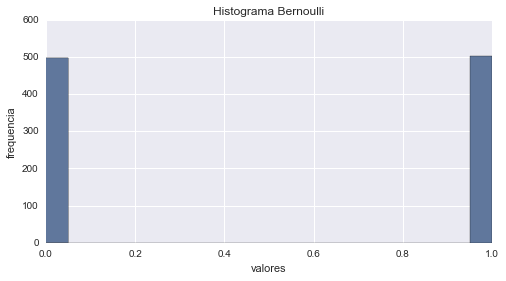

In [15]:
# histograma
aleatorios = bernoulli.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Bernoulli')
plt.show()

### Distribución Binomial

La [Distribución Binomial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial) esta dada por la formula:

$$p(r; N, p) = \left(\begin{array}{c} N \\ r \end{array}\right) p^r(1 - p)^{N - r}
$$

En dónde $r$ con la condición $0 \le r \le N$ y el parámetro $N$ ($N > 0$) son [enteros](https://es.wikipedia.org/wiki/N%C3%BAmero_entero); y el parámetro $p$ ($0 \le p \le 1$) es un [número real](https://es.wikipedia.org/wiki/N%C3%BAmero_real). La [Distribución Binomial](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_binomial) describe la *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* de exactamente $r$ éxitos en $N$ pruebas si la *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* de éxito en una sola prueba es $p$.

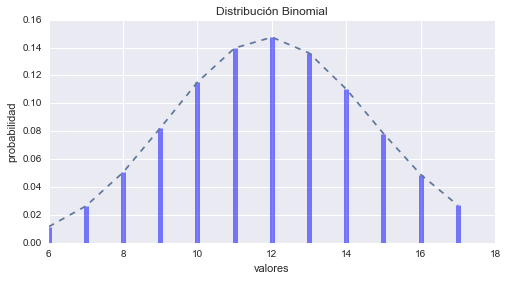

In [8]:
# Graficando Binomial
N, p = 30, 0.4 # parametros de forma 
binomial = stats.binom(N, p) # Distribución
x = np.arange(binomial.ppf(0.01),
              binomial.ppf(0.99))
fmp = binomial.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Binomial')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

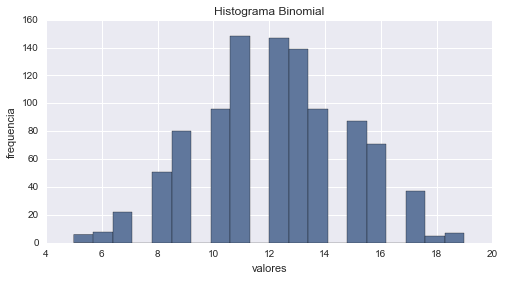

In [9]:
# histograma
aleatorios = binomial.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Binomial')
plt.show()

### Ejemplo

Un proveedor de DVDs regrabables afirma que solamente el 4 % de los artículos suministrados son defectuosos. Si un cliente compra un lote de 25 DVDs, ¿cuál es el número esperado de DVDs defectuosos en el lote? Si el cliente encuentra que 4 de los DVDs comprados son defectuosos, ¿debe dudar de la afirmación del vendedor?

In [2]:
X = stats.binom(25,0.04)
X.mean() # 1.0

1.0

In [3]:
X.sf(3)

0.016521575032415876

## Distribución Poisson

La [Distribución Poisson](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson) esta dada por la formula:

$$p(r; \mu) = \frac{\mu^r e^{-\mu}}{r!}$$

En dónde $r$ es un [entero](https://es.wikipedia.org/wiki/N%C3%BAmero_entero) ($r \ge 0$) y $\mu$ es un [número real](https://es.wikipedia.org/wiki/N%C3%BAmero_real) positivo. La [Distribución Poisson](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_Poisson) describe la *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* de encontrar exactamente $r$ eventos en un lapso de tiempo si los acontecimientos se producen de forma independiente a una velocidad constante $\mu$. Es una de las [distribuciones](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) más utilizadas en [estadística](http://relopezbriega.github.io/tag/estadistica.html) con varias aplicaciones; como por ejemplo describir el número de fallos en un lote de materiales o la cantidad de llegadas por hora a un centro de servicios. 

En [Python](http://python.org/) la podemos generar fácilmente con la ayuda de [scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html), paquete que utilizaremos para representar a todas las restantes [distribuciones](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_de_probabilidad) a lo largo de todo el artículo.

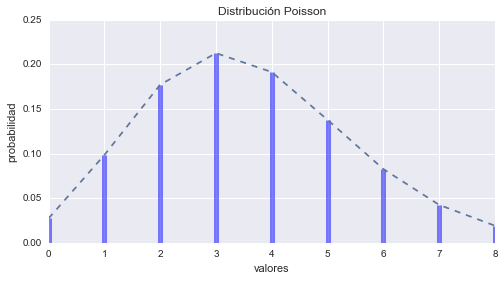

In [6]:
# Graficando Poisson
mu =  3.6 # parametro de forma 
poisson = stats.poisson(mu) # Distribución
x = np.arange(poisson.ppf(0.01),
              poisson.ppf(0.99))
fmp = poisson.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Poisson')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

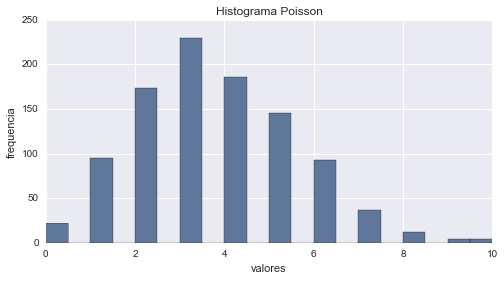

In [7]:
# histograma
aleatorios = poisson.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Poisson')
plt.show()

### Distribución Geométrica

La [Distribución Geométrica](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_geom%C3%A9trica) esta dada por la formula:

$$p(r; p) = p(1- p)^{r-1}
$$

En dónde $r \ge 1$  y el parámetro $p$ ($0 \le p \le 1$) es un [número real](https://es.wikipedia.org/wiki/N%C3%BAmero_real). La [Distribución Geométrica](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_geom%C3%A9trica) expresa la *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* de tener que esperar exactamente $r$ pruebas hasta encontrar el primer éxito si la *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* de éxito en una sola prueba es $p$. Por ejemplo, en un proceso de selección, podría definir el número de entrevistas que deberíamos realizar antes de encontrar al primer candidato aceptable.

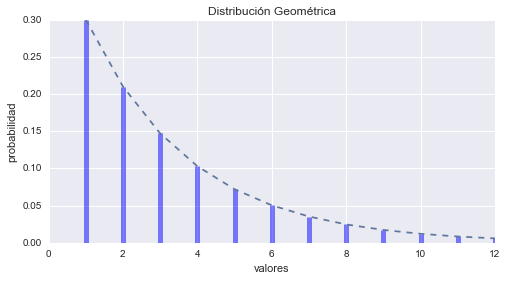

In [10]:
# Graficando Geométrica
p =  0.3 # parametro de forma 
geometrica = stats.geom(p) # Distribución
x = np.arange(geometrica.ppf(0.01),
              geometrica.ppf(0.99))
fmp = geometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Geométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

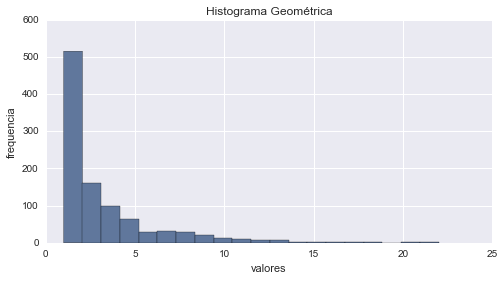

In [11]:
# histograma
aleatorios = geometrica.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Geométrica')
plt.show()

### Distribución Hipergeométrica

La [Distribución Hipergeométrica](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_hipergeom%C3%A9trica) esta dada por la formula:

$$p(r; n, N, M) = \frac{\left(\begin{array}{c} M \\ r \end{array}\right)\left(\begin{array}{c} N - M\\ n -r \end{array}\right)}{\left(\begin{array}{c} N \\ n \end{array}\right)}
$$

En dónde el valor de $r$ esta limitado por $\max(0, n - N + M)$ y $\min(n, M)$ inclusive; y los parámetros $n$ ($1 \le n \le N$), $N$ ($N \ge 1$) y $M$ ($M \ge 1$) son todos [números enteros](https://es.wikipedia.org/wiki/N%C3%BAmero_entero). La [Distribución Hipergeométrica](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_hipergeom%C3%A9trica) describe experimentos en donde se seleccionan los elementos al azar *sin reemplazo* (se evita seleccionar el mismo elemento más de una vez). Más precisamente, supongamos que tenemos $N$ elementos de los cuales $M$ tienen un cierto atributo (y $N - M$ no tiene). Si escogemos $n$ elementos al azar *sin reemplazo*, $p(r)$ es la *[probabilidad](https://es.wikipedia.org/wiki/Probabilidad)* de que exactamente $r$ de los elementos seleccionados provienen del grupo con el atributo.  

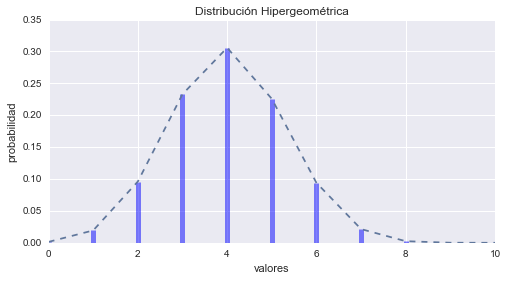

In [12]:
# Graficando Hipergeométrica
M, n, N = 30, 10, 12 # parametros de forma 
hipergeometrica = stats.hypergeom(M, n, N) # Distribución
x = np.arange(0, n+1)
fmp = hipergeometrica.pmf(x) # Función de Masa de Probabilidad
plt.plot(x, fmp, '--')
plt.vlines(x, 0, fmp, colors='b', lw=5, alpha=0.5)
plt.title('Distribución Hipergeométrica')
plt.ylabel('probabilidad')
plt.xlabel('valores')
plt.show()

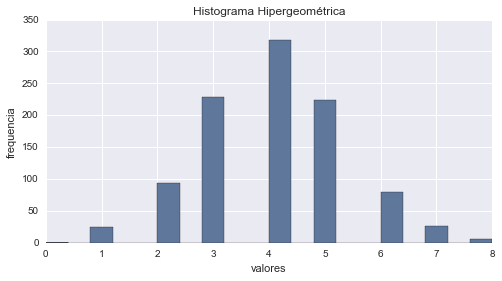

In [13]:
# histograma
aleatorios = hipergeometrica.rvs(1000)  # genera aleatorios
cuenta, cajas, ignorar = plt.hist(aleatorios, 20)
plt.ylabel('frequencia')
plt.xlabel('valores')
plt.title('Histograma Hipergeométrica')
plt.show()

In [11]:
help(stats.binom.pmf)

Help on method pmf in module scipy.stats._distn_infrastructure:

pmf(k, *args, **kwds) method of scipy.stats._discrete_distns.binom_gen instance
    Probability mass function at k of the given RV.
    
    Parameters
    ----------
    k : array_like
        Quantiles.
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        Location parameter (default=0).
    
    Returns
    -------
    pmf : array_like
        Probability mass function evaluated at k

